# Review and flag the fit results from `sncosmo`

Authors: Midori Rollins and Melissa Graham

Create and examine the distributions for the fit parameters `z`, `t0`, `x0`, `x1`, and `c`.

Review the lightcurves for potential SNIa that have outlier fit parameters.

Flag the reviewed lightcurves as 0 (ok) or 1 (poor).

Write the fit flags to file `all_fit_snia_files/results_sncosmos_fit_review.dat'`.

## Set up and read in data

Import packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

Read in the `sncosmo` results.

The fit peak magnitudes are read in but not used in this notebook.

In [2]:
fnm = 'all_fit_snia_files/results_sncosmos.dat'

fit_cand = np.loadtxt(fnm, dtype='str', usecols=(0))
fit_est_z = np.loadtxt(fnm, dtype='float', usecols=(1))
fit_in_zlo = np.loadtxt(fnm, dtype='float', usecols=(2))
fit_in_zhi = np.loadtxt(fnm, dtype='float', usecols=(3))
fit_z = np.loadtxt(fnm, dtype='float', usecols=(4))
fit_ze = np.loadtxt(fnm, dtype='float', usecols=(5))
fit_t0 = np.loadtxt(fnm, dtype='float', usecols=(6))
fit_t0e = np.loadtxt(fnm, dtype='float', usecols=(7))
fit_x0 = np.loadtxt(fnm, dtype='float', usecols=(8))
fit_x0e = np.loadtxt(fnm, dtype='float', usecols=(9))
fit_x1 = np.loadtxt(fnm, dtype='float', usecols=(10))
fit_x1e = np.loadtxt(fnm, dtype='float', usecols=(11))
fit_c = np.loadtxt(fnm, dtype='float', usecols=(12))
fit_ce = np.loadtxt(fnm, dtype='float', usecols=(13))

fit_pmB = np.loadtxt(fnm, dtype='float', usecols=(14))
fit_pmg = np.loadtxt(fnm, dtype='float', usecols=(15))
fit_pmr = np.loadtxt(fnm, dtype='float', usecols=(16))
fit_pmi = np.loadtxt(fnm, dtype='float', usecols=(17))

del fnm

## Explore the parameter distributions for *all* fits

At this stage, only reject any fits with values -99.9, which is the placeholder for "no fit".

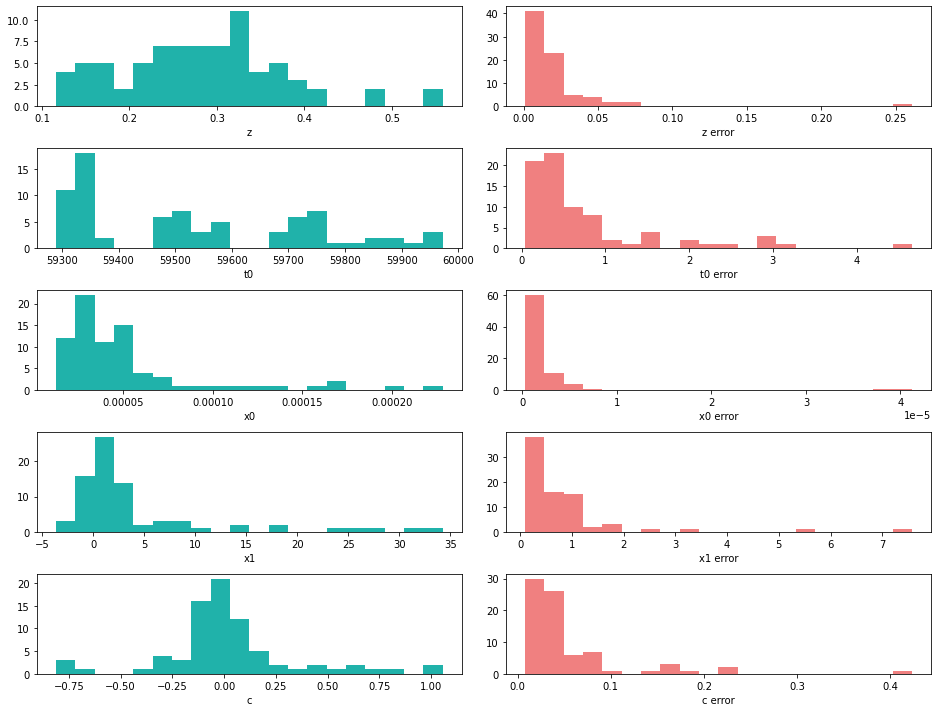

In [3]:
tx = np.where(fit_z > -90.0)[0]

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(13, 10)
ax[0,0].hist(fit_z[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[0,0].set_xlabel('z')
ax[0,1].hist(fit_ze[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[0,1].set_xlabel('z error')
ax[1,0].hist(fit_t0[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[1,0].set_xlabel('t0')
ax[1,1].hist(fit_t0e[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[1,1].set_xlabel('t0 error')
ax[2,0].hist(fit_x0[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[2,0].set_xlabel('x0')
ax[2,1].hist(fit_x0e[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[2,1].set_xlabel('x0 error')
ax[3,0].hist(fit_x1[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[3,0].set_xlabel('x1')
ax[3,1].hist(fit_x1e[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[3,1].set_xlabel('x1 error')
ax[4,0].hist(fit_c[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[4,0].set_xlabel('c')
ax[4,1].hist(fit_ce[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[4,1].set_xlabel('c error')
fig.tight_layout()
fig.show()

## Explore candidates with outlier parameter values

The main distributions for the fit paramaters are:
 * `x0` < 0.0001
 * -5 < `x1` < 5
 * -0.5 < `c` < 0.5
 
The main distributions for the fit errors are:
 * `ze` < 0.1
 * `t0e` < 2
 * `x0e` < 0.00001
 * `x1e` < 2
 * `ce` < 0.12

Identify the candidates which have outlier values in the parameter and error distributions.

In [6]:
tx_z = np.where(fit_z > 0.45)[0]
tx_x0 = np.where(fit_x0 > 0.0001)[0]
tx_x1 = np.where((fit_x1 < -5) | (fit_x1 > 5))[0]
tx_c  = np.where((fit_c < -0.5) | (0.5 < fit_c))[0]

print('Number of candidates with outlier values for')
print('z: ', len(tx_z))
print('x0: ', len(tx_x0))
print('x1: ', len(tx_x1))
print('c: ', len(tx_c))

print(' ')

tx_ze  = np.where(fit_ze > 0.1)[0]
tx_t0e = np.where(fit_t0e > 2)[0]
tx_x0e = np.where(fit_x0e > 0.00001)[0]
tx_x1e = np.where(fit_x1e > 2)[0]
tx_ce  = np.where(fit_ce > 0.12)[0]

print('Number of candidates with outlier errors for')
print('ze: ', len(tx_ze))
print('t0e: ', len(tx_t0e))
print('x0e: ', len(tx_x0e))
print('x1e: ', len(tx_x1e))
print('ce: ', len(tx_ce))

Number of candidates with outlier values for
z:  4
x0:  9
x1:  18
c:  13
 
Number of candidates with outlier errors for
ze:  1
t0e:  9
x0e:  2
x1e:  4
ce:  8


Get a list of candidate ids to review:

In [8]:
temp = []

for x in tx_z:
    temp.append(fit_cand[x])
for x in tx_x0:
    temp.append(fit_cand[x])
for x in tx_x1:
    temp.append(fit_cand[x])
for x in tx_c:
    temp.append(fit_cand[x])
for x in tx_ze:
    temp.append(fit_cand[x])
for x in tx_t0e:
    temp.append(fit_cand[x])
for x in tx_x0e:
    temp.append(fit_cand[x])
for x in tx_x1e:
    temp.append(fit_cand[x])
for x in tx_ce:
    temp.append(fit_cand[x])
    
temp2 = np.asarray(temp, dtype='str')
outlier_cand = np.unique(np.sort(temp2))
del temp, temp2

print(outlier_cand)
print(len(outlier_cand), ' candidates to visually review')

['DC21bfph' 'DC21cgfhs' 'DC21cgfui' 'DC21cvh' 'DC21cynfs' 'DC21dglus'
 'DC21dhgm' 'DC21djbfp' 'DC21driax' 'DC21dsocp' 'DC21ecmr' 'DC21edhi'
 'DC21emxv' 'DC21eoo' 'DC21eqq' 'DC21eyf' 'DC21fchc' 'DC21gbza' 'DC21gocx'
 'DC21grk' 'DC21hpdc' 'DC21ijs' 'DC21jof' 'DC21kxb' 'DC21lvlb' 'DC21lza'
 'DC21mjrj' 'DC21mvh' 'DC21pry' 'DC21vfl' 'DC22eawkf' 'DC22gtccc'
 'DC22gvcqm' 'DC22hvtap' 'DC22hvtet' 'DC22hvuhl' 'DC22ikidc' 'DC22iteny'
 'DC22iykha' 'DC22jbqyi']
40  candidates to visually review


### Review and flag LCs with outlier fit values

Open the file `all_fit_snia_files/all_fit_snia.pdf` and review the `sncosmo` fits for all the outliers.
You can page search (command-F) on the candidate id to find the `sncosmo` fit plot.
The following cell defines a review flag, 0 for ok and 1 for poor.

In [9]:
outlier_cand_review = {}

In [10]:
outlier_cand_review['DC21bfph']  = 1 # never fit, due to poorly sampled lightcurve
outlier_cand_review['DC21cgfhs'] = 1 # looks SNIa-like but we only caught the decline
outlier_cand_review['DC21cgfui'] = 1 # looks SNIa-like but we only caught the decline
outlier_cand_review['DC21cvh']   = 1 # lc is quite noisy, may have multiple peaks
outlier_cand_review['DC21cynfs'] = 0 # ok just noisy
outlier_cand_review['DC21dglus'] = 1 # we missed the peak brightness
outlier_cand_review['DC21dhgm']  = 1 # lc has multiple peaks
outlier_cand_review['DC21djbfp'] = 0 # ok just noisy
outlier_cand_review['DC21driax'] = 0 # ok just noisy
outlier_cand_review['DC21dsocp'] = 0 # ok
outlier_cand_review['DC21ecmr']  = 1 # lc is quite noisy, may have multiple peaks
outlier_cand_review['DC21edhi']  = 1 # lc is noisy, may have multiple peaks, AGN?
outlier_cand_review['DC21emxv']  = 1 # lc has multiple peaks
outlier_cand_review['DC21eoo']   = 1 # lc is quite noisy, may have multiple peaks
outlier_cand_review['DC21eqq']   = 0 # ok just barely caught peak
outlier_cand_review['DC21eyf']   = 1 # lc is quite noisy, g peak very offset from r
outlier_cand_review['DC21fchc']  = 1 # lc is quite noisy, may have multiple peaks
outlier_cand_review['DC21gbza']  = 1 # lc is quite noisy, may have multiple peaks
outlier_cand_review['DC21gocx']  = 1 # lc is quite noisy, may have multiple peaks
outlier_cand_review['DC21grk']   = 1 # lc is noisy, has multiple peaks (AGN?)
outlier_cand_review['DC21hpdc']  = 1 # might be a fast transient
outlier_cand_review['DC21ijs']   = 1 # AGN?
outlier_cand_review['DC21jof']   = 0 # ok just barely caught peak
outlier_cand_review['DC21kxb']   = 1 # ok but didn't catch rise, has slow decline 
outlier_cand_review['DC21lvlb']  = 1 # poor fit, not really declining
outlier_cand_review['DC21lza']   = 1 # AGN?
outlier_cand_review['DC21mjrj']  = 1 # we missed the peak brightness
outlier_cand_review['DC21mvh']   = 1 # lc is quite noisy, may have multiple peaks
outlier_cand_review['DC21pry']   = 1 # lc is quite noisy, not clearly declining
outlier_cand_review['DC21vfl']   = 1 # lc sparsely sampled, fit has multiple peaks
outlier_cand_review['DC22eawkf'] = 0 # ok
outlier_cand_review['DC22gtccc'] = 0 # ok
outlier_cand_review['DC22gvcqm'] = 1 # we missed the peak brightness
outlier_cand_review['DC22hvtap'] = 1 # we missed the peak brightness
outlier_cand_review['DC22hvtet'] = 1 # looks SNIa-like but we only caught the >20 day decline
outlier_cand_review['DC22hvuhl'] = 1 # looks SNIa-like but we only caught the >20 day decline
outlier_cand_review['DC22ikidc'] = 0 # ok but barely caught the rise
outlier_cand_review['DC22iteny'] = 1 # lc sparsely sampled, fit has multiple peaks
outlier_cand_review['DC22iykha'] = 0 # ok
outlier_cand_review['DC22jbqyi'] = 1 # SLSN?

Define a `fit_flag` array to be used with the rest of the `fit_` arrays.

In [11]:
fit_flag = np.zeros(len(fit_z), dtype='float')
for c, cand in enumerate(fit_cand):
    if cand in outlier_cand_review:
        fit_flag[c] = outlier_cand_review[cand]

This is how the `fit_flag` array can work.

In [12]:
tx = np.where(fit_flag == 1)[0]
print(fit_cand[tx])
del tx

['DC21bfph' 'DC21cgfhs' 'DC21cgfui' 'DC21cvh' 'DC21dglus' 'DC21dhgm'
 'DC21ecmr' 'DC21edhi' 'DC21emxv' 'DC21eoo' 'DC21eyf' 'DC21fchc'
 'DC21gbza' 'DC21gocx' 'DC21grk' 'DC21hpdc' 'DC21ijs' 'DC21kxb' 'DC21lvlb'
 'DC21lza' 'DC21mjrj' 'DC21mvh' 'DC21pry' 'DC21vfl' 'DC22gvcqm'
 'DC22hvtap' 'DC22hvtet' 'DC22hvuhl' 'DC22iteny' 'DC22jbqyi']


Double check that none of the outliers are missing from `outlier_cand_review` dictionary.

In [13]:
for cand in outlier_cand:
    if cand not in outlier_cand_review:
        print(cand, ' not yet a key in outlier_cand_review')

If any candidate ids are printed above, review their lightcurve fits and add a review flag to
the cell above.

### Replot distributions without the flagged candidates

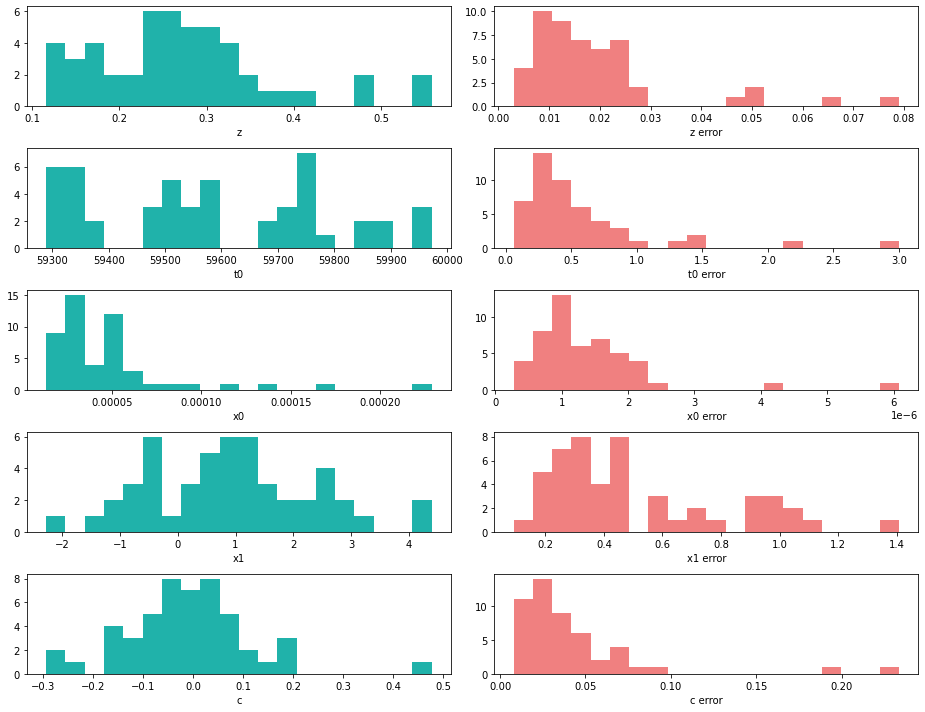

In [17]:
tx = np.where(fit_flag == 0)[0]

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(13, 10)
ax[0,0].hist(fit_z[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[0,0].set_xlabel('z')
ax[0,1].hist(fit_ze[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[0,1].set_xlabel('z error')
ax[1,0].hist(fit_t0[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[1,0].set_xlabel('t0')
ax[1,1].hist(fit_t0e[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[1,1].set_xlabel('t0 error')
ax[2,0].hist(fit_x0[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[2,0].set_xlabel('x0')
ax[2,1].hist(fit_x0e[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[2,1].set_xlabel('x0 error')
ax[3,0].hist(fit_x1[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[3,0].set_xlabel('x1')
ax[3,1].hist(fit_x1e[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[3,1].set_xlabel('x1 error')
ax[4,0].hist(fit_c[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[4,0].set_xlabel('c')
ax[4,1].hist(fit_ce[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[4,1].set_xlabel('c error')
fig.tight_layout()
fig.show()

## Explore Midori's fit review flags

After looking through the PDF of fits for all candidates, all were rated as good, maybe, or bad.

> **0 = Good**: sncosmo fits our data very well; our data captures both the rise 
and fall of the supernova; has typical parameter values w/out large errors

> **1 = Maybe**: sncosmo fits our data somewhat well; not enough data/our data only 
captures the incline/decline of the supernova; may have abnormal parameter values & large errors; missing in a band

> **2 = Bad**: sncosmo does not fit our data well; our data is bad/clearly not 
type 1a-like; has abnormal parameter values w/ large errors

In [18]:
fnm = 'all_fit_snia_files/MR_review_ratings.txt'
mr_rating_candid = np.loadtxt(fnm, dtype='str', usecols=(0))
mr_rating_flag   = np.loadtxt(fnm, dtype='int', usecols=(1))

In [19]:
fit_flagMR = np.zeros(len(fit_flag), dtype='int')

for c, cand in enumerate(fit_cand):
    cx = np.where(cand == mr_rating_candid)[0]
    if len(cx) == 1:
        fit_flagMR[c] = mr_rating_flag[cx[0]]
    elif len(cx) != 1:
        print('Add to MR_review_ratings.txt: ', cand)

#### Replot distributions without Midori's flagged candidates

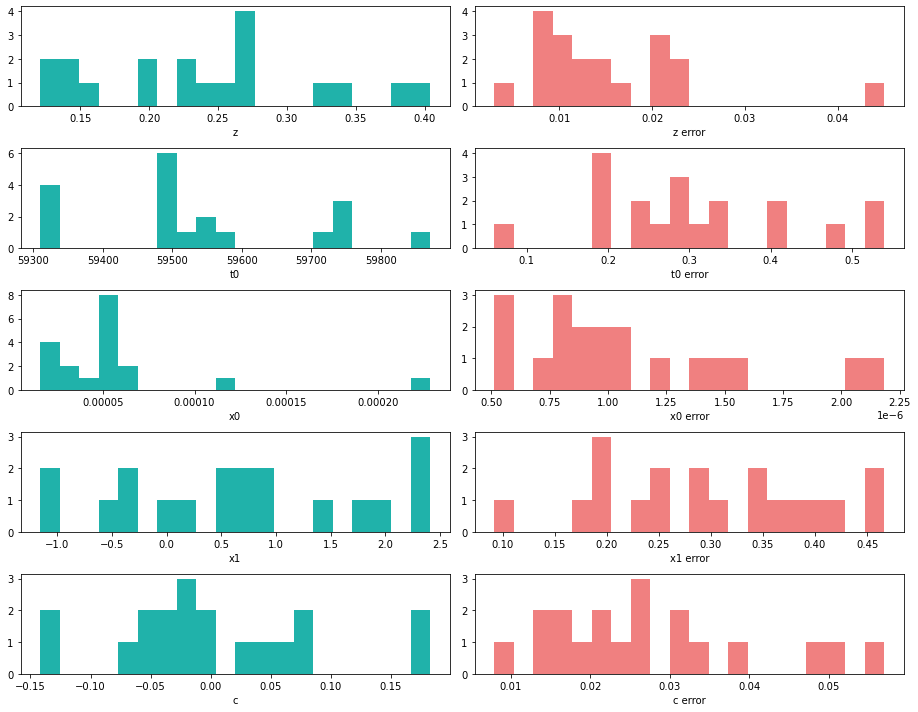

In [21]:
tx = np.where(fit_flagMR == 0)[0]

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(13, 10)
ax[0,0].hist(fit_z[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[0,0].set_xlabel('z')
ax[0,1].hist(fit_ze[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[0,1].set_xlabel('z error')
ax[1,0].hist(fit_t0[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[1,0].set_xlabel('t0')
ax[1,1].hist(fit_t0e[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[1,1].set_xlabel('t0 error')
ax[2,0].hist(fit_x0[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[2,0].set_xlabel('x0')
ax[2,1].hist(fit_x0e[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[2,1].set_xlabel('x0 error')
ax[3,0].hist(fit_x1[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[3,0].set_xlabel('x1')
ax[3,1].hist(fit_x1e[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[3,1].set_xlabel('x1 error')
ax[4,0].hist(fit_c[tx], bins=20, density=False, histtype='stepfilled', color='lightseagreen')
ax[4,0].set_xlabel('c')
ax[4,1].hist(fit_ce[tx], bins=20, density=False, histtype='stepfilled', color='lightcoral')
ax[4,1].set_xlabel('c error')
fig.tight_layout()
fig.show()

## Compare MLG and MR review flags

Add in a bit of scatter just so we can see how many points are at each grid location.

 * Most of the candidates MLG flags as '1' (bad) are flagged by MR as '2' (bad).
 * None of the candidates MLG flags as '1' (bad) are flagged by MR as '0' (good).
 * Many of the candidates MR flags as '1' (maybe) are flagged by MLG as '0' (good).

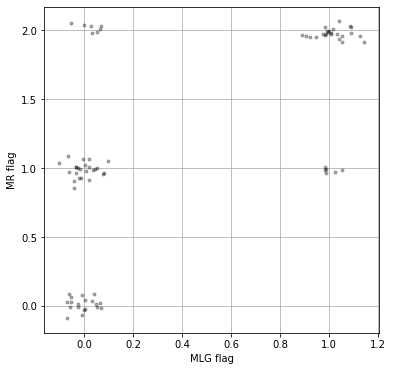

In [29]:
plt.figure(figsize=(6, 6))
r1 = np.random.normal(scale=0.05, size=len(fit_flag))
r2 = np.random.normal(scale=0.05, size=len(fit_flag))
plt.plot(fit_flag+r1, fit_flagMR+r2, 'o', ms=3, alpha=0.3, color='black')
plt.grid()
plt.xlabel('MLG flag')
plt.ylabel('MR flag')
plt.show()

## Write review results flag to file

In [30]:
fnm = 'all_fit_snia_files/results_sncosmos_fit_review.dat'
fout = open(fnm, 'w')

fout.write('# Melissa Graham & Midori Rollins, review_potential_snia_sncosmos.ipynb \n')
tnow = time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime())
fout.write('# UTC = '+tnow+' \n')
del tnow
fout.write('# \n')
fout.write('# Columns \n')
fout.write('#  0 id -- candidate identifier \n')
fout.write('#  1 fit flag: 0 for OK, 1 for poor fit \n')
fout.write('#  2 fit flag by Midori Rollins:  \n')
fout.write('# \n')

for c in range(len(fit_cand)):
    fout.write('%-14s %2i %2i \n' % (fit_cand[c], fit_flag[c], fit_flagMR[c]))
        
fout.close()
print('Wrote to: ', fnm)
del fnm

Wrote to:  all_fit_snia_files/results_sncosmos_fit_review.dat
